# Pryngles Tutorials: Developers
## Part 4 - Modules Body and System

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- It is still working under version 0.9.0.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [21]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [22]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [2]:
from pryngles import *
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

## Core modules

## System (`system`)

`System` is probably the most important module in `Pryngles`.  Using System you will be able to create a planetary system and spangle it. You can also be able to simulate realistically the motion of the objects using Rebound. 

To create a system use:

In [3]:
sys=System()
print("Nbodies = ",sys.nbodies)
print("G constant = ",sys.G)
print("G constant = ",sys.units)
print("Canonical units = ",sys.ul,sys.um,sys.ut)

Nbodies =  0
G constant =  0.9999999999999997
G constant =  ['au', 'msun', 'yr2pi']
Canonical units =  149597870700.0 1.9884754159665356e+30 5022642.89091303


As you can see the most important aspects of the System is set from the beginning, including the canonical units used by the system.  You can set the units using:

In [4]:
sys=System(units=["au","msun","day"])
print("G constant = ",sys.G)
print("G constant = ",sys.units)
print("Canonical units = ",sys.ul,sys.um,sys.ut)

G constant =  0.00029591220828559104
G constant =  ['au', 'msun', 'day']
Canonical units =  149597870700.0 1.9884754159665356e+30 86400.0


Once you have created a system add particles:

In [5]:
S=sys.add(name="Star")
print(sys)

{'sim': None, 'bodies': OrderedDict([('Star', <pryngles.system.Star object at 0x7fa63b68ba90>)]), 'root': <pryngles.system.Star object at 0x7fa63b68ba90>, 'source': None, 'center_root': array([0, 0, 0]), 'orbital_configuration': None, 'n_obs': array([0, 0, 1]), 'alpha_obs': 0, 'center_obs': None, 'sg': None, 'units': ['au', 'msun', 'day'], 'ul': 149597870700.0, 'um': 1.9884754159665356e+30, 'G': 0.00029591220828559104, 'ut': 86400.0, 'nbodies': 1, 'spangle_scatterers': {2: (<class 'pryngles.optics.LambertianGrayAtmosphere'>, {'AS': 'albedo_gray_spherical'}), 4: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 3: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 1: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 0: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 5: (<class 'pryngles.optics.BlackBodySurface'>, {}), 6: (<class 'pryngles.optics.BlackBodySurface'>

If you don't specify nothing a new star is added to the system.

You may update the properties of an object:

In [6]:
S.update_body(m=3,radius=0.5)
print(sys.bodies["Star"])

{'kind': 'Star', 'sg': None, 'name': 'Star', 'childs': {}, 'name_by_kind': True, 'source': <pryngles.system.Star object at 0x7fa63b68ba90>, 'm': 3, 'radius': 0.5, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 'q0': 0, 'nspangles': 1000, 'spangle_type': 6, 'shape': 'sphere', 'geometry_args': {}, 'seed': 0, 'preset': True, 'albedo_gray_spherical': 1, 'albedo_gray_normal': 1, 'tau_gray_optical': 0, 'primary': None, 'optics': {}, 'orbit': {}, 'physics': {}, 'limb_coeffs': [], 'elements': {'m': 3}, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'norm_limb_darkening': 3.141592653589793, 'shined': ['Star']}


Notice that the object has a new mass.  Now you can add new objects:

In [7]:
P=sys.add("Planet",name="Planet",primary=S,radius=0.1,a=5)

Notice that you need to indicate the object pointing to the primary.

In [8]:
M=sys.add("Planet",name="Moon",primary=P,radius=0.1,a=1)
R=sys.add("Ring",name="Ring",parent=P,fi=1.3,fe=2.3,i=20*Consts.deg)

Once you have added objects you can initialize orbit:

In [9]:
sys.initialize_simulation()

Check the orbits:

<IPython.core.display.Javascript object>


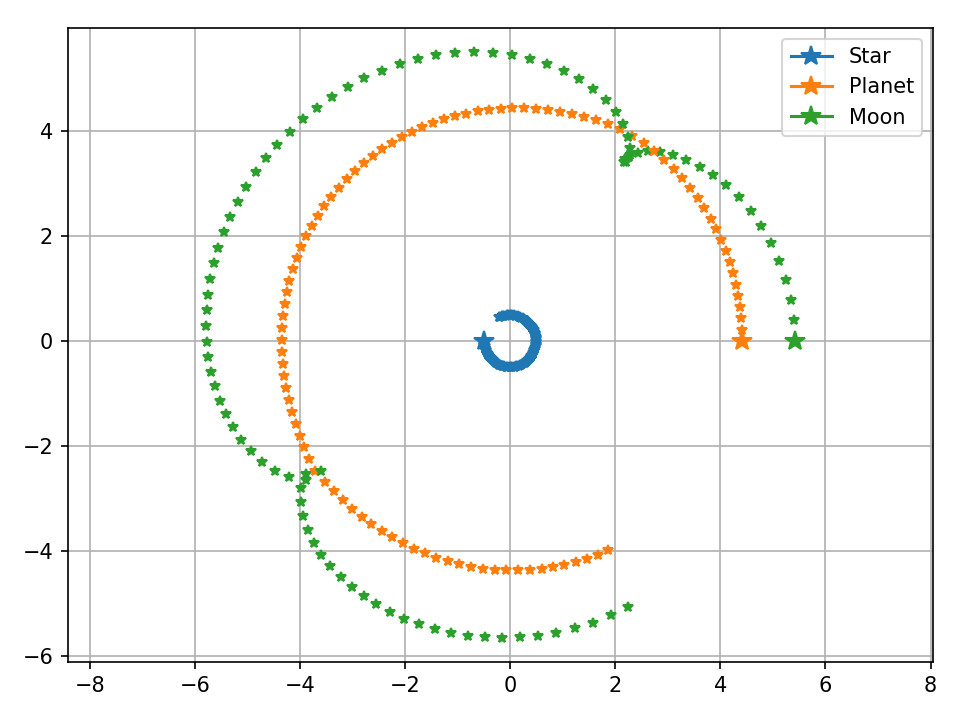

100%|██████████| 100/100 [00:00<00:00, 764.65it/s]


In [10]:
fig=OrbitUtil.preview_rebound(sys.sim,traces=True,axis=True,marker='*',ms=5)

If you are running this in Jupyter you may create an animation:

<IPython.core.display.Javascript object>


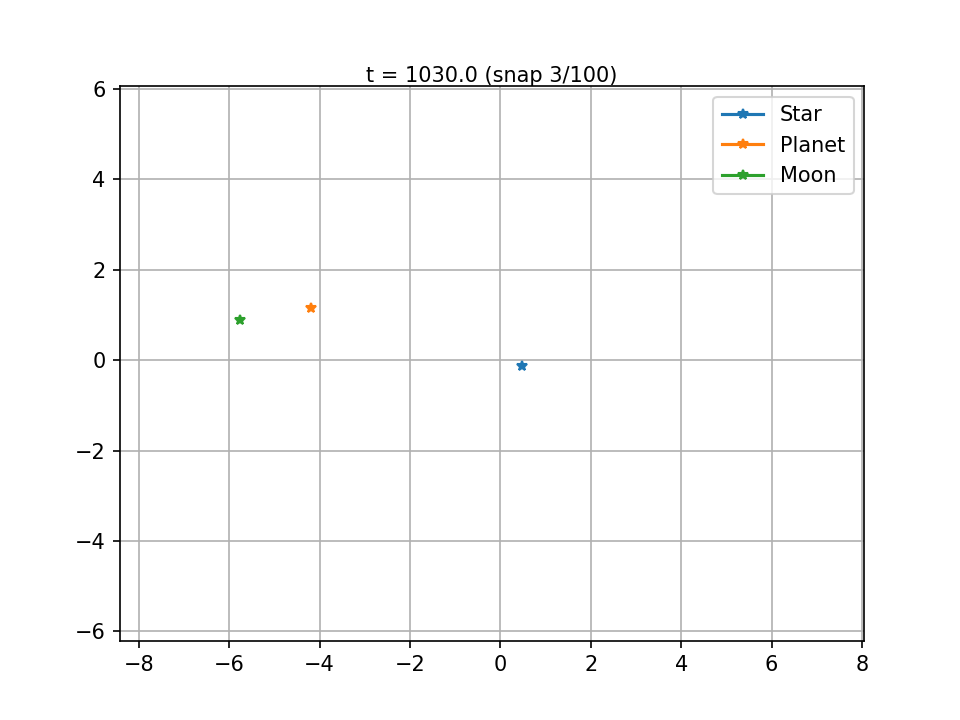

100%|██████████| 100/100 [00:00<00:00, 358.91it/s]


In [11]:
fig=OrbitUtil.preview_rebound(sys.sim,traces=False,axis=True,marker='*',ms=5)

Once a system is created you may check the status of Rebound:

In [12]:
sys.sim.status()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	May  7 2022 18:49:54
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	1.8481507365634391e+03
Current timestep:    	9.007408
---------------------------------
<rebound.particle.Particle object at 0x7fa5f8cdcbc0, m=3.0 x=-0.24911255865310983 y=0.42820132745046285 z=0.0 vx=-0.001208493714282817 vy=-0.0006914479116137003 vz=0.0>
<rebound.particle.Particle object at 0x7fa5f8cdccc0, m=0.30000000000000004 x=2.210840184027608 y=-3.812967734548697 z=0.0 vx=0.010438514153630351 vy=0.005647833400707165 vz=0.0>
<rebound.particle.Particle object at 0x7fa5f8cdcbc0, m=0.030000000000000006 x=2.8028540250349017 y=-4.690455399559309 z=0.0 vx=0.016464229891978172 vy=0.012666457154298372 vz=0.0>
---------------------------------


At any time you may save the system:

In [13]:
sys.save_to("/tmp/system.pkl")

When pickling a system sabes two files: a `.pkl` file with the `System` object and a `.pkl.rbin` with the `Rebound` simulation.

In [14]:
!ls -lh /tmp/system.*

-rw-r--r--  1 jorgezuluagacallejas  wheel   2.7K Jul  3 11:38 /tmp/system.pkl
-rw-r--r--  1 jorgezuluagacallejas  wheel   6.7K Jul  3 11:38 /tmp/system.pkl.rbin
-rw-r--r--  1 jorgezuluagacallejas  wheel   256B Jul  2 00:08 /tmp/system.py


Yo may recover a simulation using:

In [15]:
sys=System(filename="/tmp/system.pkl")
print(sys)

{'bodies': OrderedDict([('Star', <pryngles.system.Star object at 0x7fa6295dd310>), ('Planet', <pryngles.system.Planet object at 0x7fa6295dd3a0>), ('Moon', <pryngles.system.Planet object at 0x7fa6295dd190>), ('Ring', <pryngles.system.Ring object at 0x7fa618cc3820>)]), 'root': <pryngles.system.Star object at 0x7fa6295dd310>, 'source': None, 'center_root': array([0, 0, 0]), 'orbital_configuration': None, 'n_obs': array([0, 0, 1]), 'alpha_obs': 0, 'center_obs': None, 'sg': None, 'units': ['au', 'msun', 'day'], 'ul': 149597870700.0, 'um': 1.9884754159665356e+30, 'G': 0.00029591220828559104, 'ut': 86400.0, 'nbodies': 4, 'spangle_scatterers': {2: (<class 'pryngles.optics.LambertianGrayAtmosphere'>, {'AS': 'albedo_gray_spherical'}), 4: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 3: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 1: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 0: (<class 'p

Once you have the system defined, spangle it:

In [16]:
print(sys.nbodies)

4


Now it's time to spangle the system:

In [24]:
sys.spangle_system()

VERB0::elapsed_time:: Spangling time: 2.66685 s = 2.67 s


<IPython.core.display.Javascript object>


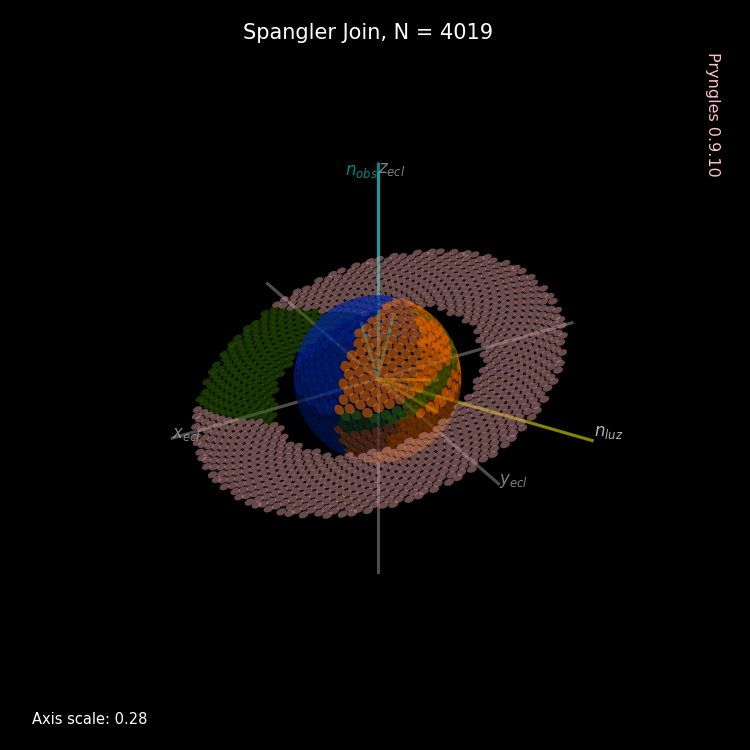

VERB0::elapsed_time:: Plotting time: 2.09926 s = 2.10 s


In [25]:
sys.sg.plot3d(center_at="Ring")

<IPython.core.display.Javascript object>


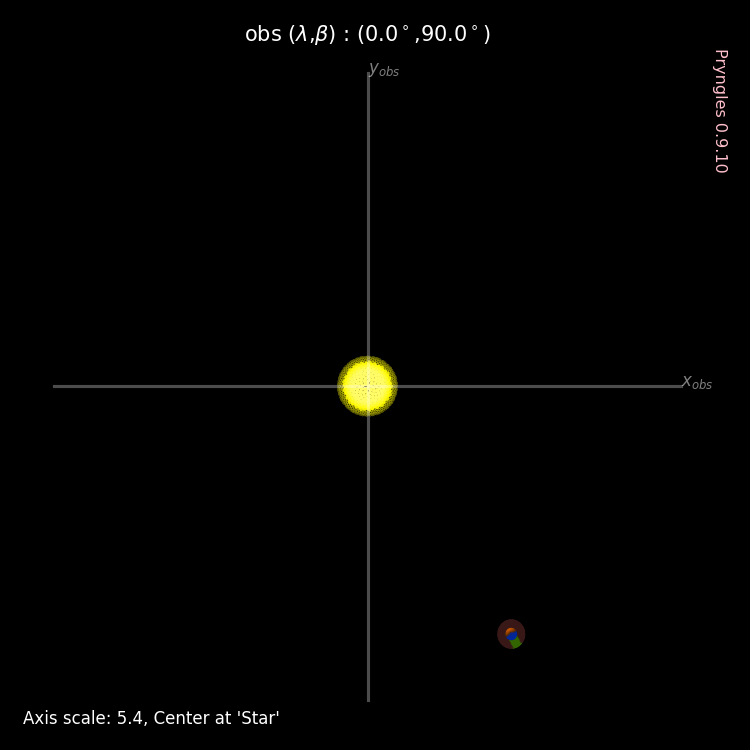

(-0.2491077897891285, 0.428193876358744)

In [20]:
sys.sg.plot2d(include=[S,P,R])

--- 
*The authors*, Last update: october, 2022.